In [52]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
from collections import OrderedDict

import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import MESS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate a suite of synthetic community data that resembles our empirical data

In [58]:
emp_coms = OrderedDict({"Mauritius_weevils":12, "Reunion_weevils":13, "Reunion_spiders":50, "Trees_1":52, "Trees_2":47})
for name, n in emp_coms.items():
    print(name)
    synthetic_df = MESS.util.synthetic_community(nspecies=n)

Mauritius_weevils
Trees_1
Trees_2
Reunion_spiders
Reunion_weevils


## Load up the trained  RF Classifier and Regressor

In [6]:
trained_cla = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/cv_classify_results/rf.mdl"
cla = MESS.inference.Ensemble.load(infile=trained_cla)
print(cla.classification_report)

              precision    recall  f1-score   support

 competition       0.83      0.78      0.81      2657
   filtering       0.78      0.74      0.76      2868
     neutral       0.80      0.89      0.85      2903

   micro avg       0.81      0.81      0.81      8428
   macro avg       0.81      0.81      0.80      8428
weighted avg       0.81      0.81      0.80      8428



## Predict community assembly model class for each synthetic dataset

In [19]:
cla_preds_df = pd.DataFrame()
for name, n in emp_coms.items():
    ## Have to include the fake metacommunity_traits here so all the trait
    ## stats will be calculated, to take the same form as the simulations.
    cla.set_data(empirical_df=synthetic_df, metacommunity_traits=synthetic_df["trait"]*2)
    cla_pred = cla.predict()[1]
    cla_pred.index = [name]
    cla_preds_df = pd.concat([cla_preds_df, cla_pred])
print(cla_preds_df)

                   competition  filtering   neutral
Mauritius_weevils     0.019583   0.143750  0.836667
Trees_1               0.022917   0.184583  0.792500
Trees_2               0.040000   0.192500  0.767500
Reunion_spiders       0.020000   0.108750  0.871250
Reunion_weevils       0.085833   0.144583  0.769583


## Plot classification probabilities

[None, None, None, None, None, None, None, None, None, None]

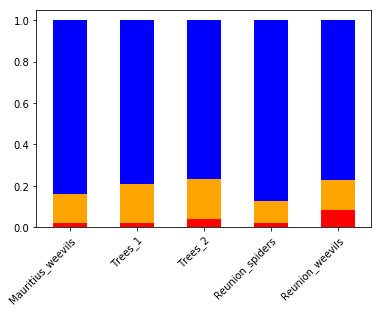

In [25]:
ax = cla_preds_df.plot.bar(stacked=True, legend=False, color=['r', 'orange', 'b'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

## Load the regressor and estimate parameters
Using the gb regressor here so we can get prediction intervals. Here we load a regressor trained on very many simulations, so it'll act better.

In [56]:
trained_rgr = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/cv_predict_results/rfq/neutral.mdl"
rgr = MESS.inference.Ensemble.load(infile=trained_rgr)


## (Optional) Use a dummy rgr trained on toy data for testing
If you don't have a model trained up on tons of sims then just get one trained on a subset of the sims.

In [55]:

## Create a fake toy community df
synthetic_df = MESS.util.synthetic_community(nspecies=30)
## Make the regressor
rgr = MESS.inference.Regressor(empirical_df=synthetic_df, simfile=simfile, target_model="neutral",\
                                metacommunity_traits=synthetic_df["trait"]*2, algorithm="rfq")
## Train and predict
rgr.predict(select_features=True, param_search=False, quick=True, verbose=True)

Selecting features:
  alpha	

KeyboardInterrupt: 

## Get estimates and prediction intervals for all the synthetic communities

In [60]:
rgr_preds = OrderedDict()

for name, n in emp_coms.items():
    print(name)
    synthetic_df = MESS.util.synthetic_community(nspecies=n)
    ## Have to include the fake metacommunity_traits here so all the trait
    ## stats will be calculated, to take the same form as the simulations.
    rgr.set_data(empirical_df=synthetic_df, metacommunity_traits=synthetic_df["trait"]*2)
    rgr_pred = rgr.predict()
    rgr_preds[name] = rgr_pred
    display(rgr_pred)


Mauritius_weevils


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8057.457509,0.203130,1826.479444,0.002049,1596.384340,0.000874,0.897294
lower 0.025,5240.547007,0.001200,1129.399999,0.001030,916.124935,0.000510,0.844607
upper 0.975,9903.569179,0.916093,3884.125328,0.005910,2371.304587,0.002260,0.984617


Trees_1


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8206.454473,0.210090,5423.390556,0.006345,831.623032,0.000993,0.969656
lower 0.025,5576.914355,0.001195,2554.418182,0.002170,427.779662,0.000520,0.931974
upper 0.975,9949.000000,0.864499,9644.857294,0.009576,1423.812778,0.002749,0.997474


Trees_2


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8235.518942,0.215152,5398.436111,0.003639,921.333829,0.001070,0.969148
lower 0.025,5579.951071,0.001230,2559.105264,0.001050,485.156294,0.000520,0.930088
upper 0.975,9973.929020,0.840113,9627.034342,0.008226,1527.739108,0.002742,0.997954


Reunion_spiders


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8116.346153,0.228356,5223.427222,0.006886,866.538565,0.001480,0.971047
lower 0.025,4668.560842,0.001260,2554.518518,0.002867,434.000000,0.000530,0.930606
upper 0.975,9950.568520,0.869417,9626.193394,0.009845,1478.981262,0.003447,0.997732


Reunion_weevils


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8242.342967,0.173906,1843.715556,0.001963,1533.258745,0.000792,0.917964
lower 0.025,5833.558169,0.001200,1109.928565,0.001030,840.199992,0.000510,0.841178
upper 0.975,9857.847425,0.876852,3904.230272,0.004919,2330.546979,0.001470,0.984821


## Figure out how to do the gd plot

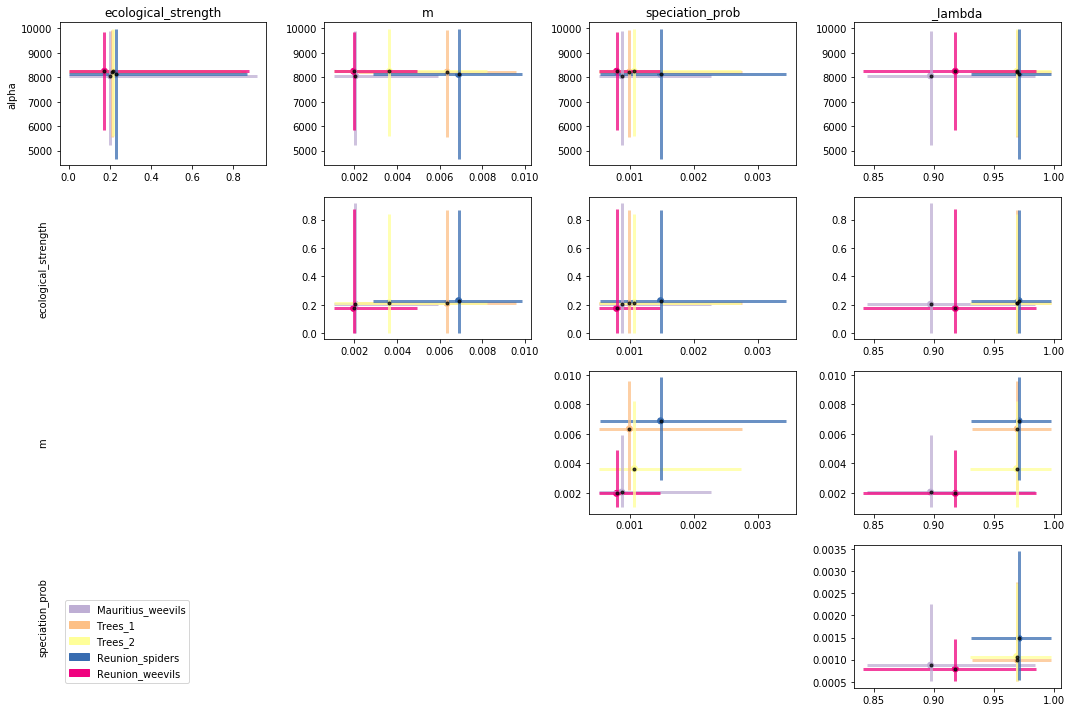

In [217]:
## Minus 1 because we don't do pairwise comparisons within parameters
## Real data
n_targets = len(rgr_preds[rgr_preds.keys()[0]].columns) - 1
targets = rgr.targets

## Probably used for the manu
targets = ["alpha", "ecological_strength", "m", "speciation_prob", "_lambda"]
n_targets = len(targets) - 1

## Small for testing
#n_targets=3
#targets = ["alpha", "ecological_strength", "J", "m"]

offset = 1
colors = cmap=plt.get_cmap("Accent").colors[offset:len(rgr_preds)+offset]

fig, axs = plt.subplots(n_targets, n_targets, figsize=(15, 10))#, sharey=True)
for ridx, t1 in enumerate(targets[:-1]):
    
    axs[ridx][0].set_ylabel("{}".format(t1))

    ## Hide the ticks, labels, and spines of the axes we aren't plotting to.
    ## There's probably a cleaner way to do this. We could use ax.axis('off'),
    ## but the problem is we want to retain the ylabel, so we have to shut off
    ## everything but the ylabel by hand.
    for cidx, _ in enumerate(targets[:ridx]):
        ##print("Hide axis: {} {}".format(ridx, cidx))
        axs[ridx][cidx].set_yticklabels([])
        axs[ridx][cidx].set_xticklabels([])
        axs[ridx][cidx].tick_params(top='off', bottom='off', left='off', right='off')
        axs[ridx][cidx].spines['right'].set_visible(False)
        axs[ridx][cidx].spines['top'].set_visible(False)
        axs[ridx][cidx].spines['bottom'].set_visible(False)
        axs[ridx][cidx].spines['left'].set_visible(False)

    for cidx, t2 in enumerate(targets[ridx+1:]):
        if ridx == 0:
            axs[ridx][cidx+ridx].set_title("{}".format(t2))

        ## Error bars are not absolute values they are +/- wrt to the xy coord
        x = np.array([rgr_preds[v][t2]["estimate"] for v in rgr_preds])
        y = np.array([rgr_preds[v][t1]["estimate"] for v in rgr_preds])
        x_low = x - np.array([rgr_preds[v][t2]["lower 0.025"] for v in rgr_preds])
        x_high = np.array([rgr_preds[v][t2]["upper 0.975"] for v in rgr_preds]) - x
        y_low = y - np.array([rgr_preds[v][t1]["lower 0.025"] for v in rgr_preds])
        y_high = np.array([rgr_preds[v][t1]["upper 0.975"] for v in rgr_preds]) - y
        axs[ridx][cidx+ridx].errorbar(x, y, yerr=[y_low, y_high], xerr=[x_low, x_high], color='black',\
                                      ecolor=colors, fmt='.', linewidth=3, alpha=.75)
        axs[ridx][cidx+ridx].scatter(x, y, color=colors, marker='o')

import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colors[x], label=rgr_preds.keys()[x]) for x in range(len(rgr_preds))]
axs[-1][0].legend(handles=patches, loc='lower left')
plt.tight_layout()
